### Introduction:
We want to pick a neighborhood in pittsburgh to potentially purchase property to live in and we use a few metrics to judge each neighborhood based on our opinion on what is important to us in a neighborhood.
Metrics:
- Crime: Occurence of crime in particular neigbhorhood
- City owned property: the more property that city owns in a neighborhood the less economically neighborhood is
- Population: the livelihood of the niegborhood

![banker](banker.jpg)

In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#load all the dataset we will use
crime = pd.read_csv("crime.csv")
prop = pd.read_csv("house.csv")
pop = pd.read_csv("population.csv")

In [8]:
#sort out the dataset for crime, property owned by city and population

#crime
incidents = crime.INCIDENTNEIGHBORHOOD.value_counts().rename_axis('Neighborhood').reset_index(name='counts')
incidents.head()

#property owned by city
house=prop.neighborhood_name.value_counts().rename_axis('Neighborhood').reset_index(name='counts')
house.head()

#population
#drop margin of error columns
drop_col = ['Id', 'Margin of Error; Total']
pop = pop.drop(columns=drop_col)
#rename 'estimate; total' to counts
pop=pop.rename(columns={'Estimate; Total':'counts'})
pop.head()
pop_desc = pop.sort_values(by='counts', ascending=False)


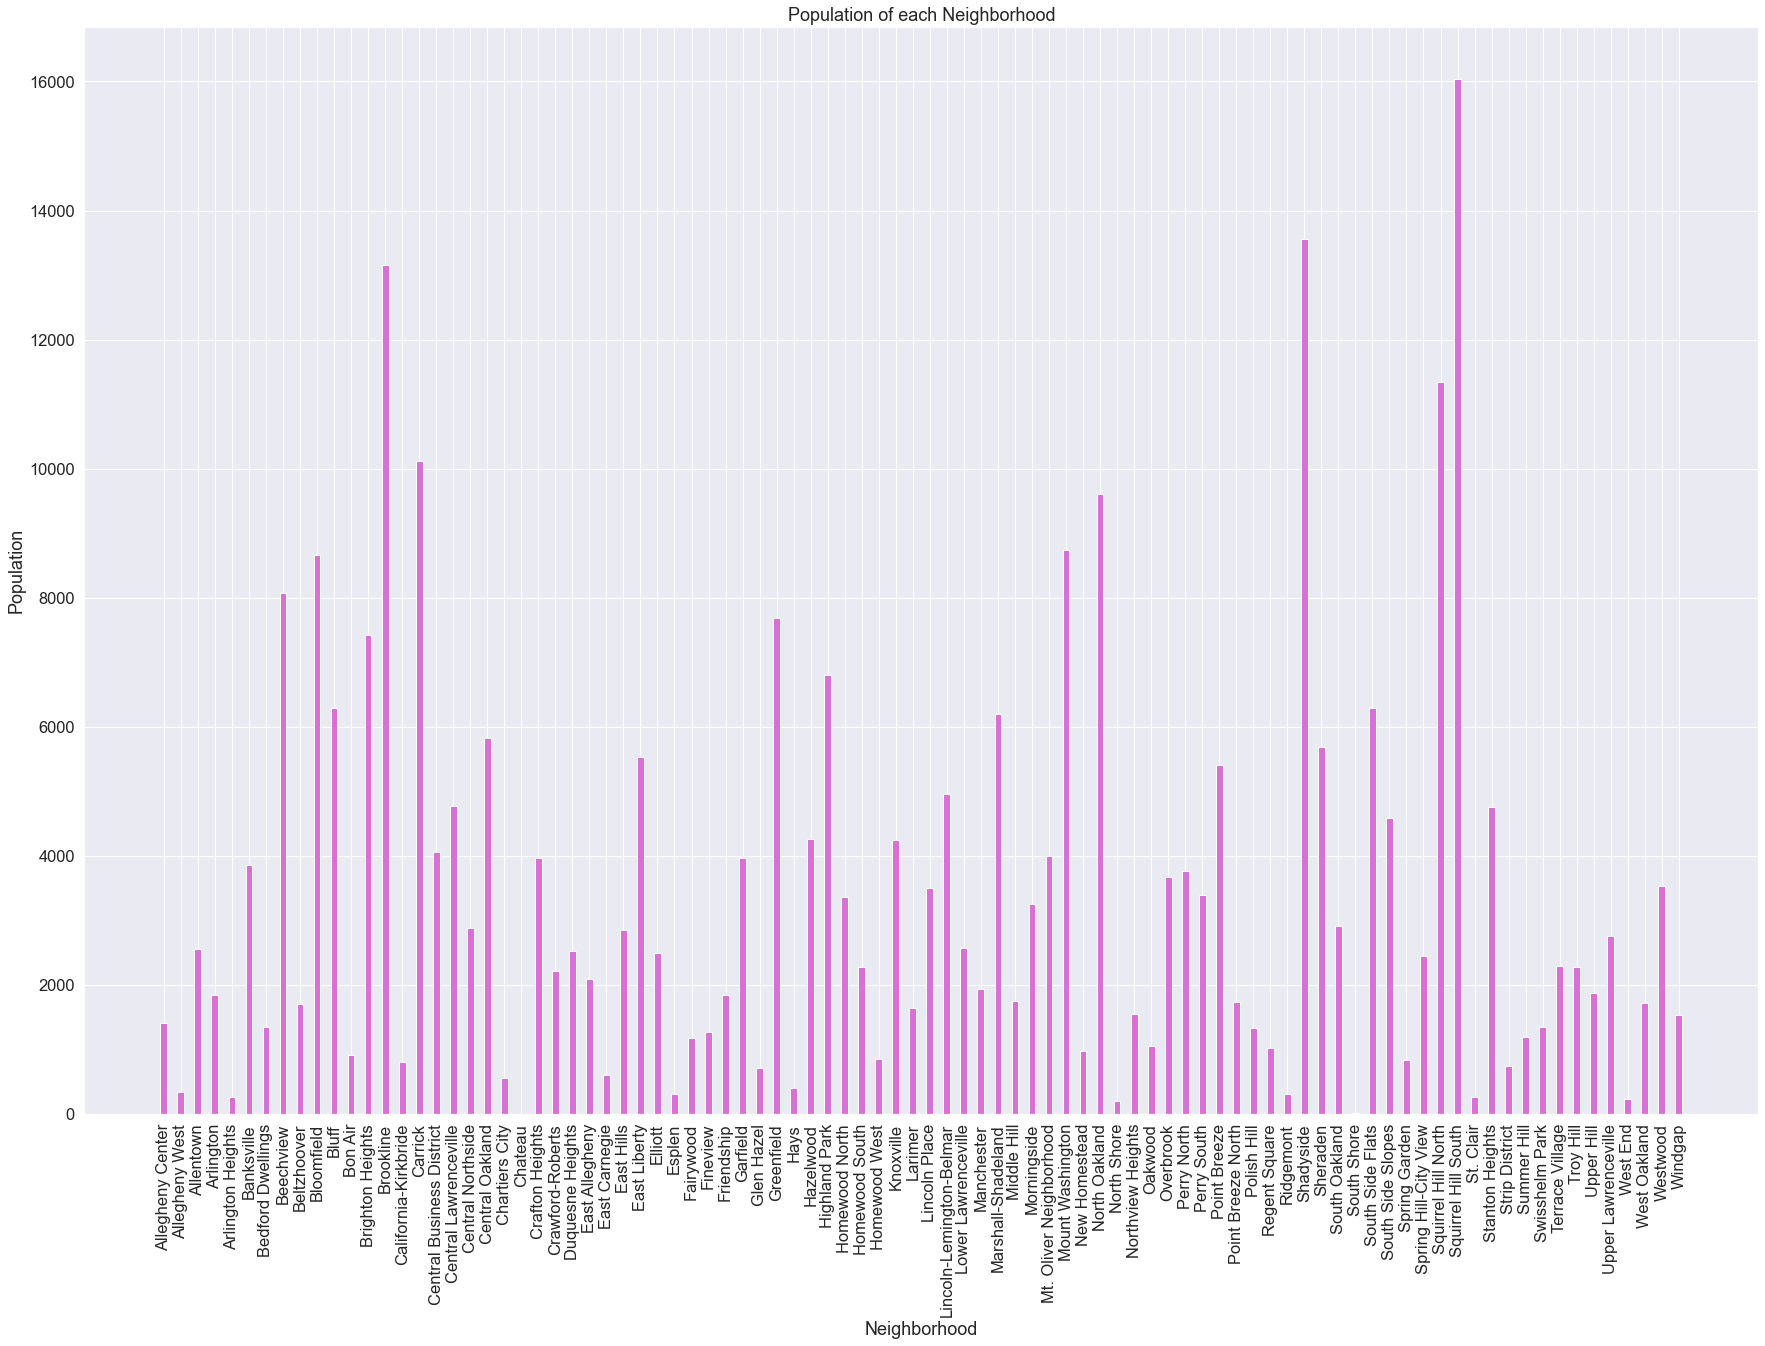

In [23]:
#graph neighborhood popoulation

fig = plt.figure(figsize = (30,20))
font_size = 22

plt.bar(pop['Neighborhood'], pop['counts'], color = 'orchid', width = 0.4)
plt.xticks(rotation= 90)
plt.rc('xtick', labelsize = font_size )

plt.xlabel("Neighborhood")
plt.ylabel("Population")
plt.title("Population of each Neighborhood")

plt.show()

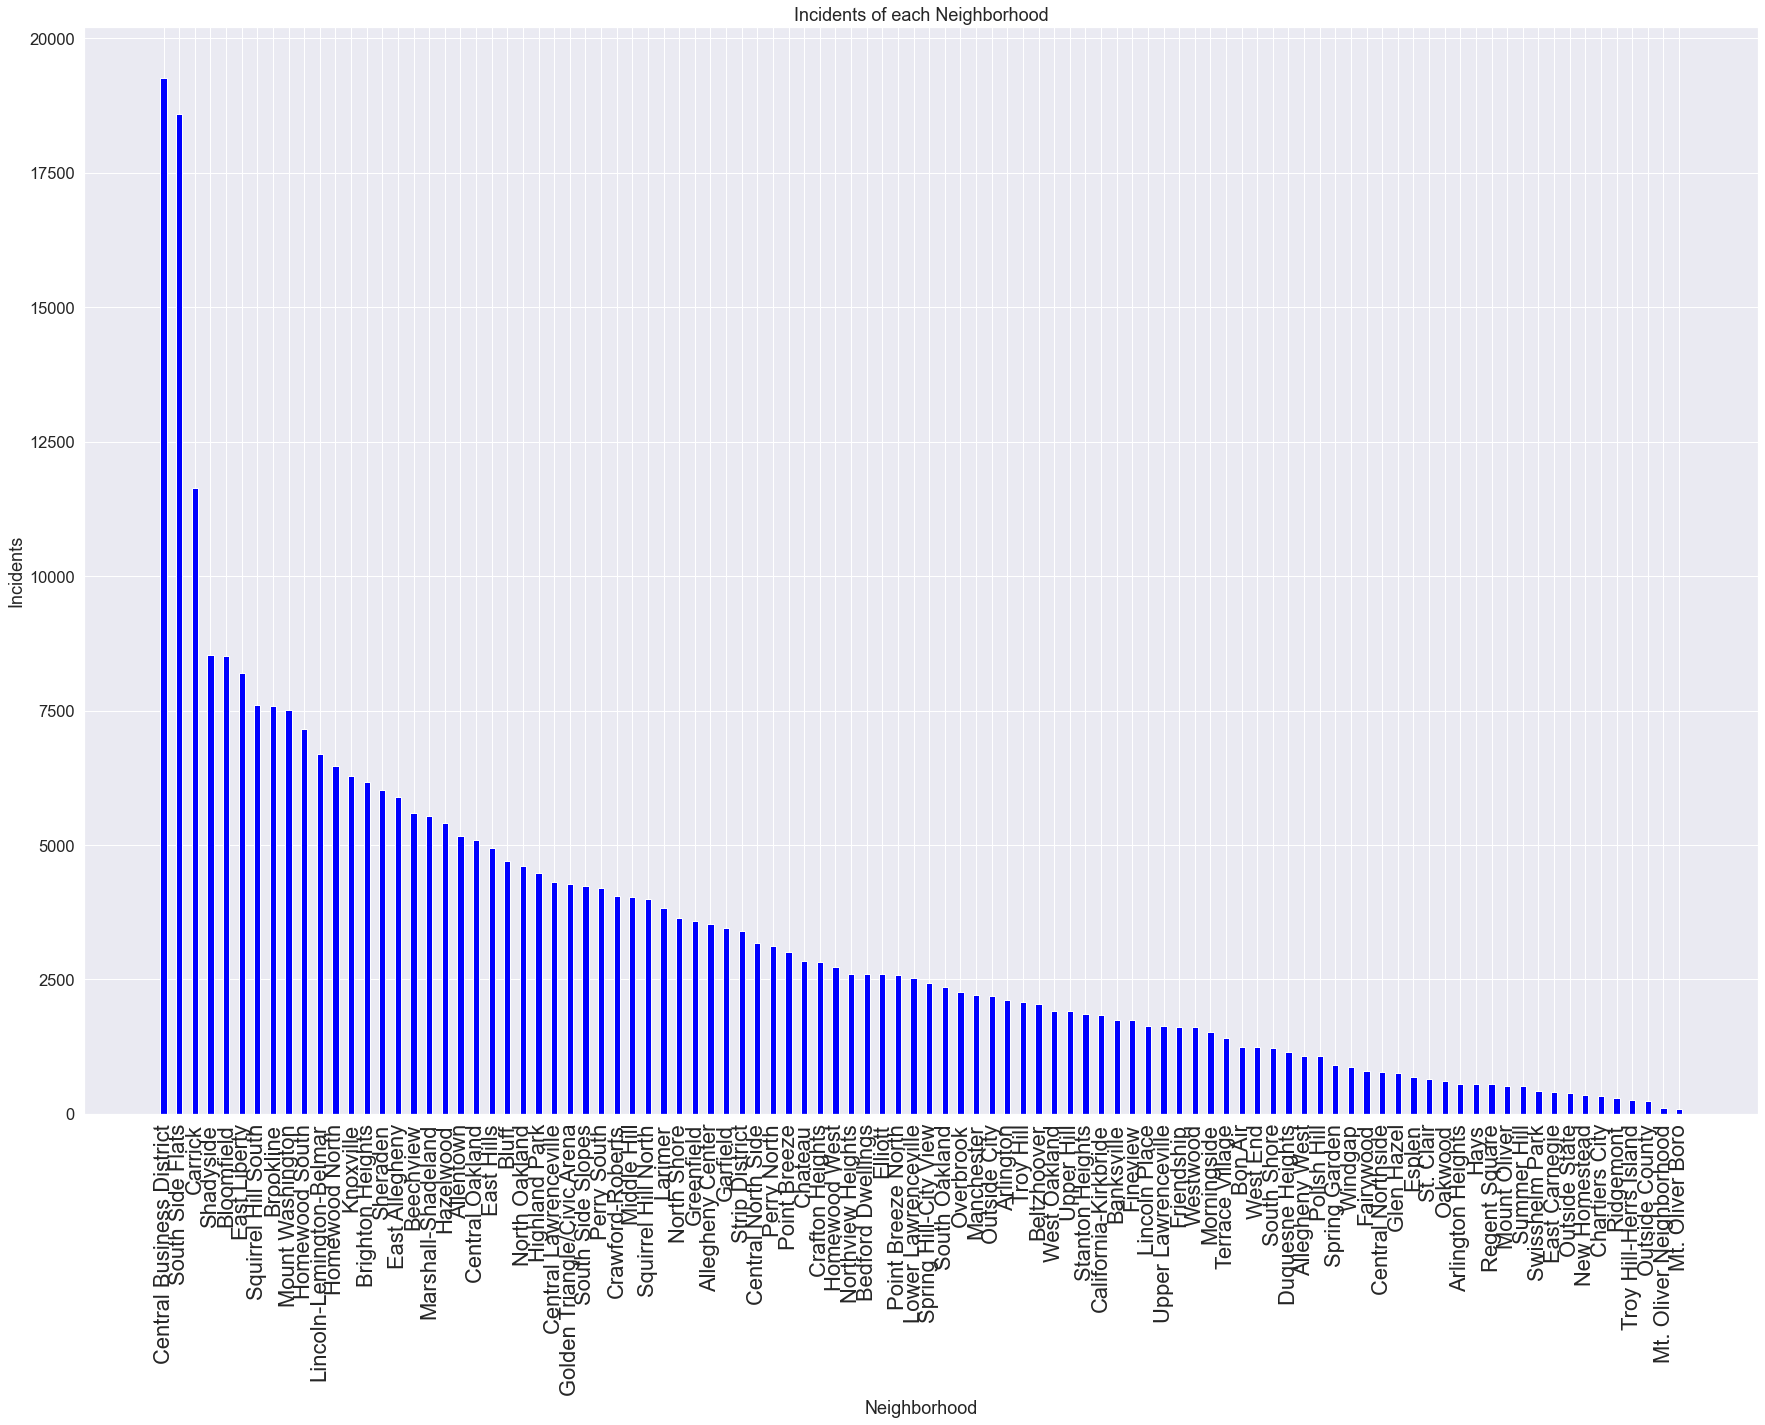

In [24]:
#graph neighborhood popoulation

fig = plt.figure(figsize = (30,20))
font_size = 22

plt.bar(incidents['Neighborhood'], incidents['counts'], color = 'blue', width = 0.4)
plt.xticks(rotation= 90)
plt.rc('xtick', labelsize = font_size )

plt.xlabel("Neighborhood")
plt.ylabel("Incidents")
plt.title("Incidents of each Neighborhood")

plt.show()

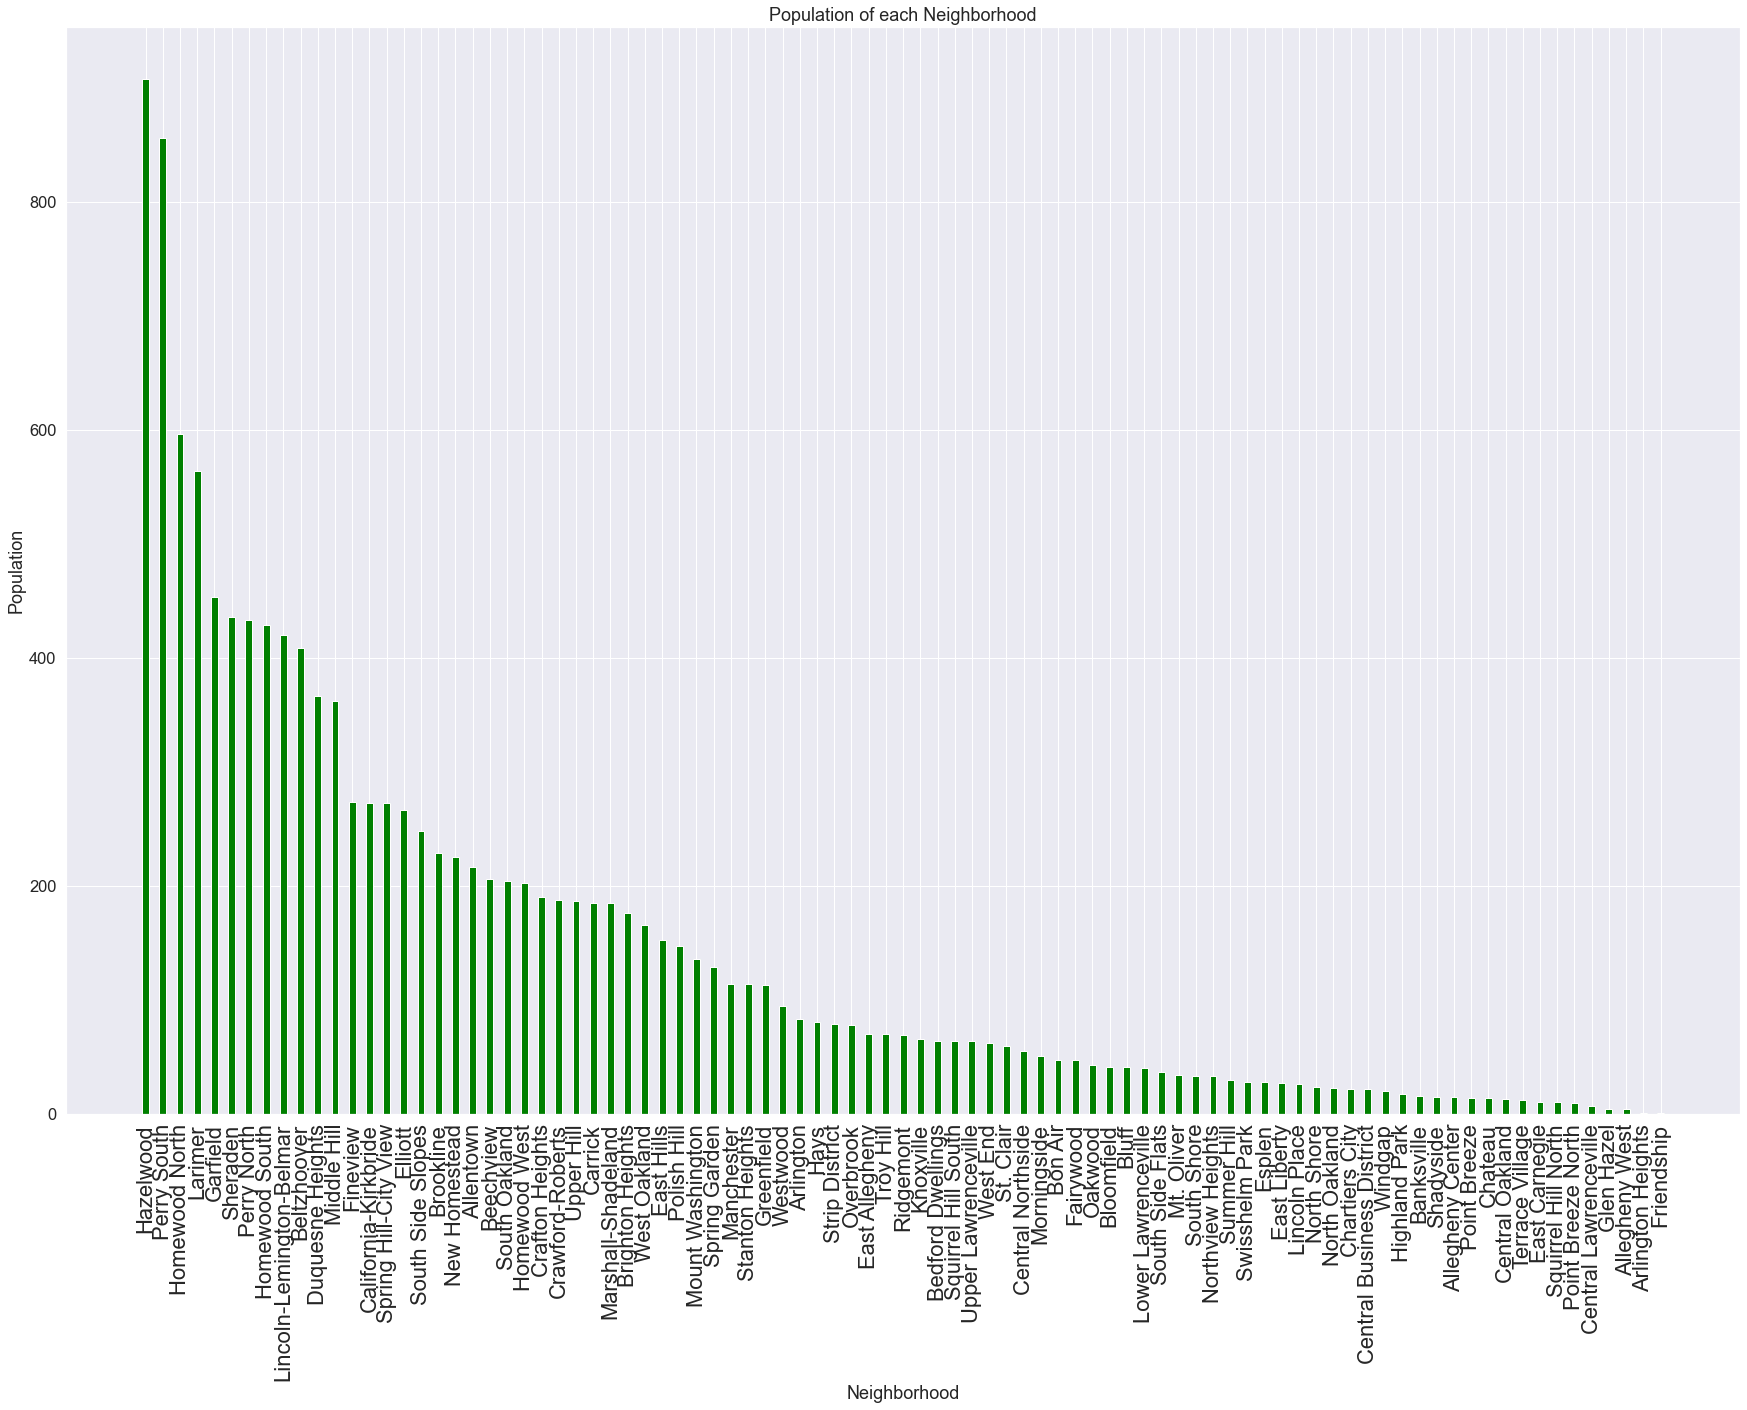

In [25]:
#graph neighborhood popoulation

fig = plt.figure(figsize = (30,20))
font_size = 22

plt.bar(house['Neighborhood'], house['counts'], color = 'green', width = 0.4)
plt.xticks(rotation= 90)
plt.rc('xtick', labelsize = font_size )

plt.xlabel("Neighborhood")
plt.ylabel("Population")
plt.title("Population of each Neighborhood")

plt.show()

### data cleaning and find the common neighborhood for a three dataset
One of the issue we face after graphing all these dataset is that not all neighborhoods are in the three dataset so we have to find common neighborhood in the dataset by using interesection function

In [10]:
#commone elements between house and incidents
home = house['Neighborhood'].tolist()
inci = incidents['Neighborhood'].tolist()

common_elements = set(home).intersection(set(inci))
ce = list(common_elements)


#drop the columns that are not in common elements
h_df = house[house['Neighborhood'].isin(ce)]
i_df = incidents[incidents['Neighborhood'].isin(ce)]

#sort columns columns alphabetically
#housing
hdf = h_df.sort_values(by='Neighborhood')
#incidents
idf = i_df.sort_values(by='Neighborhood')

#merge the two dataset together 
df = pd.merge(hdf,idf, on='Neighborhood')
#rename columns counts_x and counts_y to property and incidents
df = df.rename(columns={'counts_x': 'property','counts_y':'crime'})

pop_col = set(pop['Neighborhood'])
df_col = set(df['Neighborhood'])

intersection = list(pop_col.intersection(df_col))

#drop the rows that are not in commone elements between df and population
pdf = pop[pop['Neighborhood'].isin(intersection)]

#merge df and population together
df = pd.merge(pdf,df, on = 'Neighborhood')
#rename counts to population
df = df.rename(columns={'counts':'population'})
df.head()

,Neighborhood,population,property,crime
0,Allegheny Center,1411,15,3532
1,Allegheny West,343,4,1077
2,Allentown,2558,217,5164
3,Arlington,1852,83,2109
4,Arlington Heights,272,1,561


### Graph all the columns

#### Population

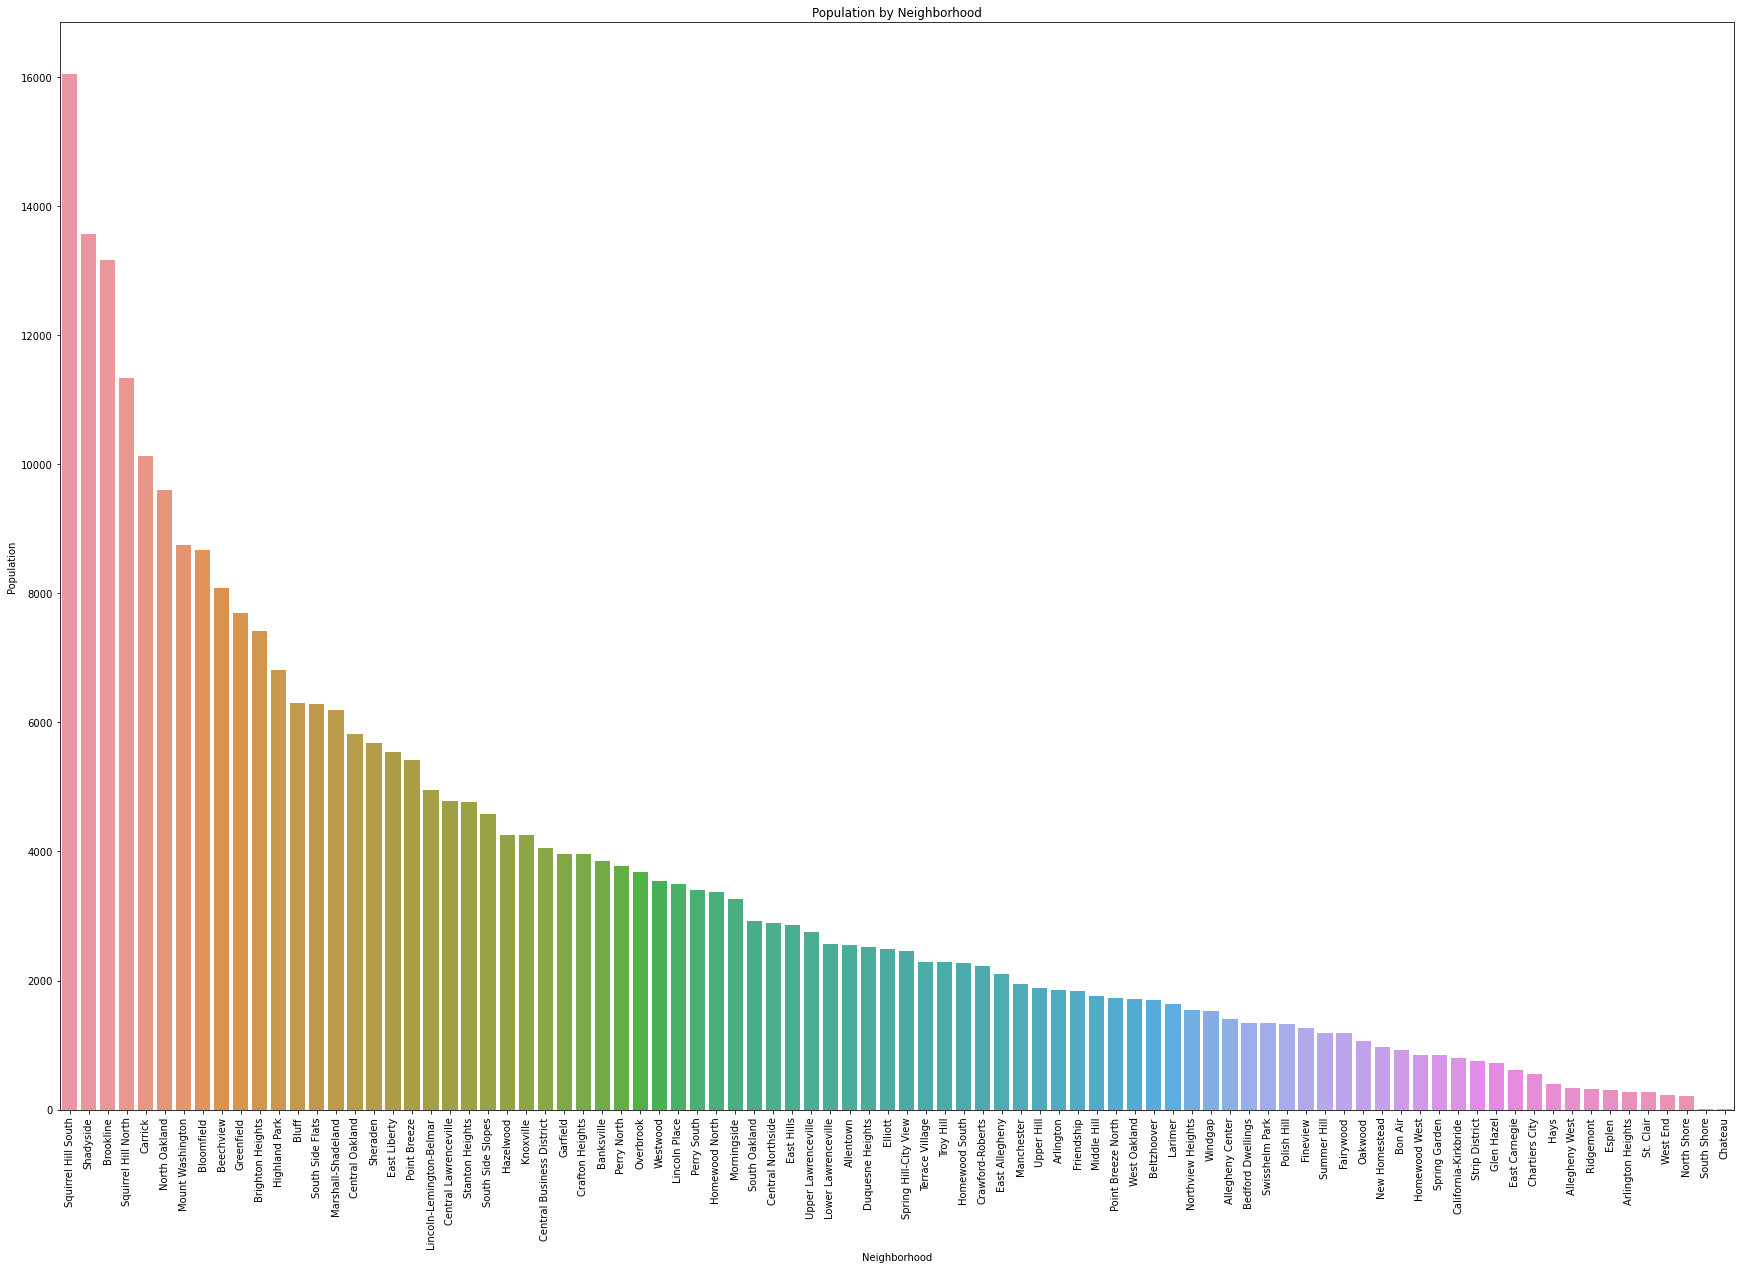

In [11]:
#descending order for population
col_drop = ['property','crime']
df_p = df.drop(col_drop, axis = 1)
df_p = df_p.sort_values(by='population', ascending = False)

plt.figure(figsize=(30, 20))  # Set the size of the plot

sns.barplot(x='Neighborhood', y='population', data=df_p)
plt.title('Population by Neighborhood')

plt.xlabel('Neighborhood')
plt.ylabel('Population')

plt.xticks(rotation=90)
plt.show()

#### Property

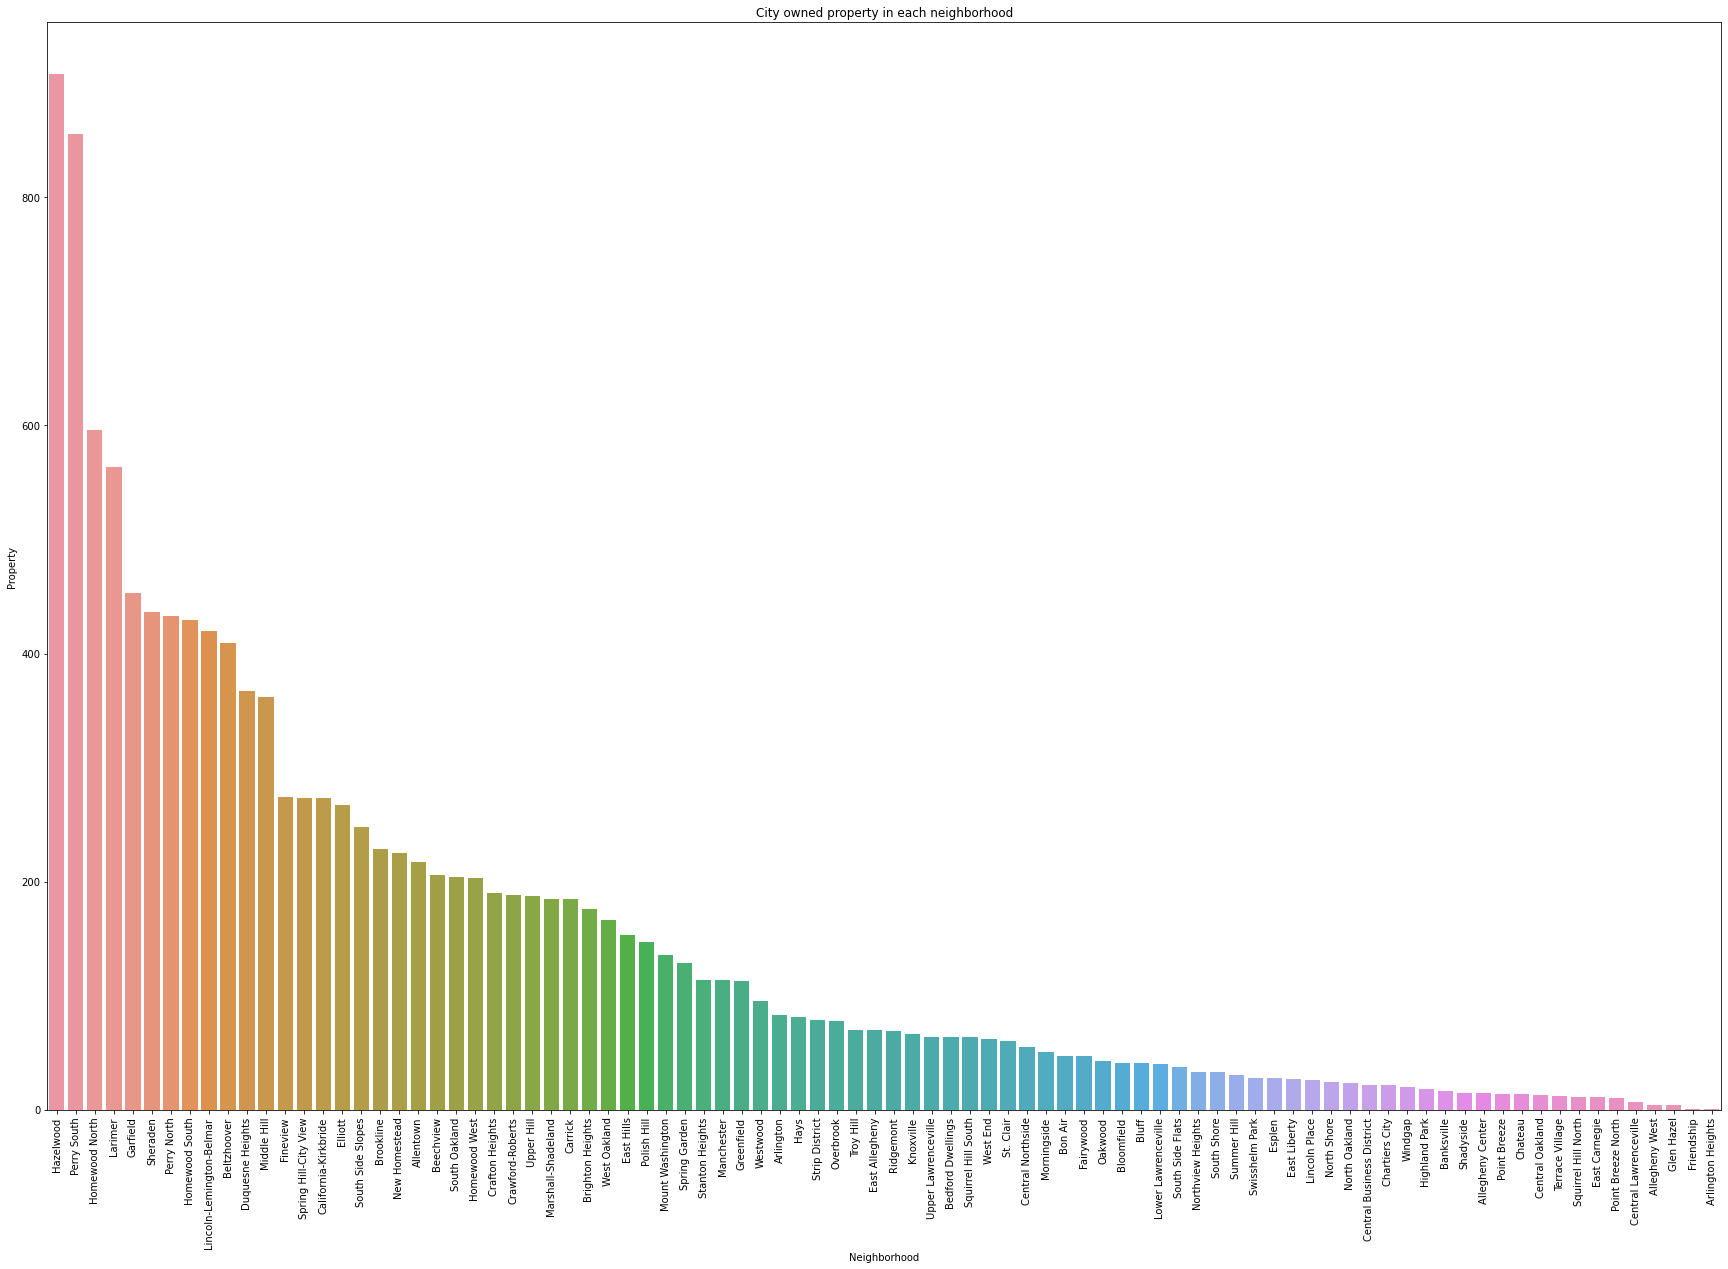

In [12]:
#descending order for population
col_drop = ['population','crime']
df_pr = df.drop(col_drop, axis = 1)
df_pr = df_pr.sort_values(by='property', ascending = False)


plt.figure(figsize=(30, 20))  
sns.barplot(x='Neighborhood', y='property', data=df_pr)
plt.title('City owned property in each neighborhood')

plt.xlabel('Neighborhood')
plt.ylabel('Property')

plt.xticks(rotation=90)
plt.show()

#### crime

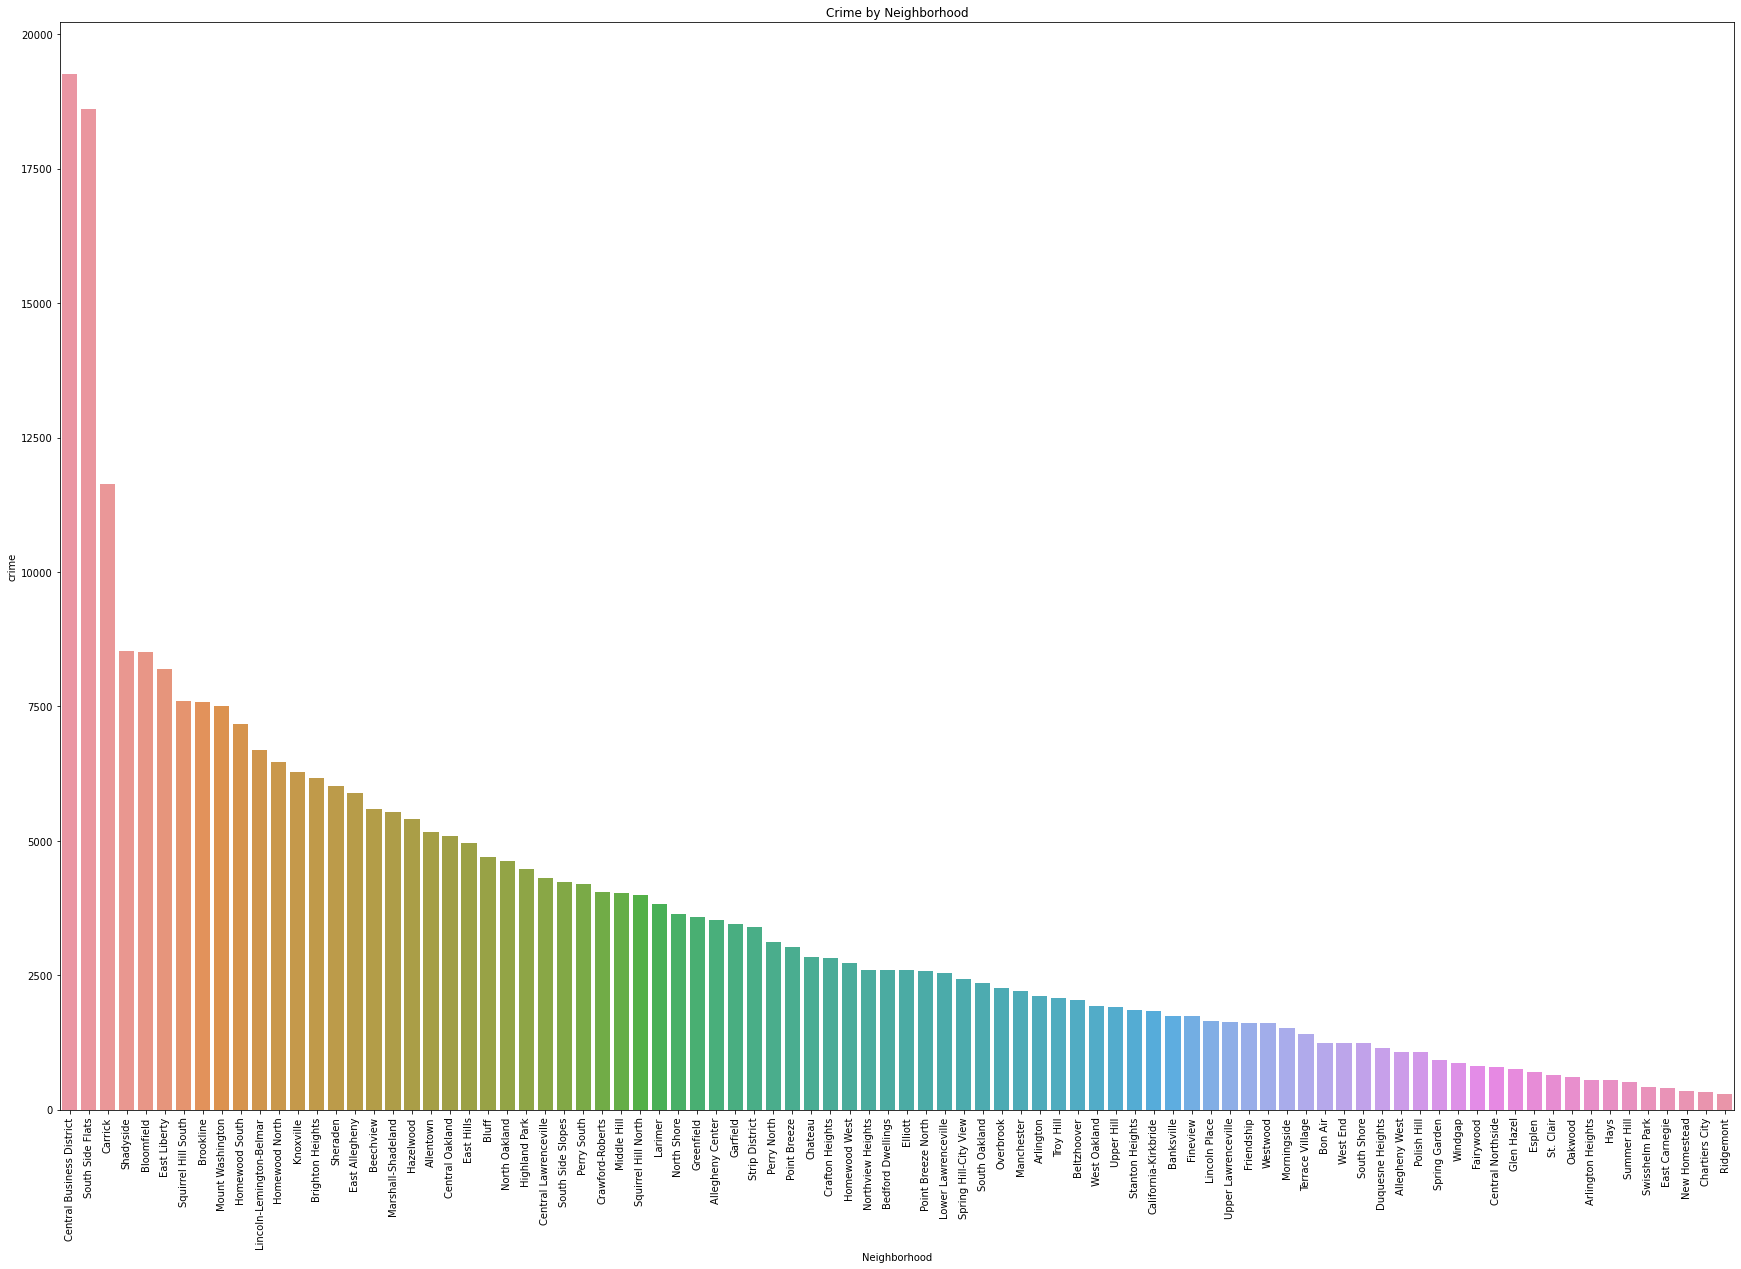

In [13]:
#descending order for population
col_drop = ['property','population']
df_c = df.drop(col_drop, axis = 1)
df_c = df_c.sort_values(by='crime', ascending = False)



plt.figure(figsize=(30, 20))
sns.barplot(x='Neighborhood', y='crime', data=df_c)
plt.title('Crime by Neighborhood')

plt.xlabel('Neighborhood')
plt.ylabel('crime')

plt.xticks(rotation=90)
plt.show()

### Graph All three together

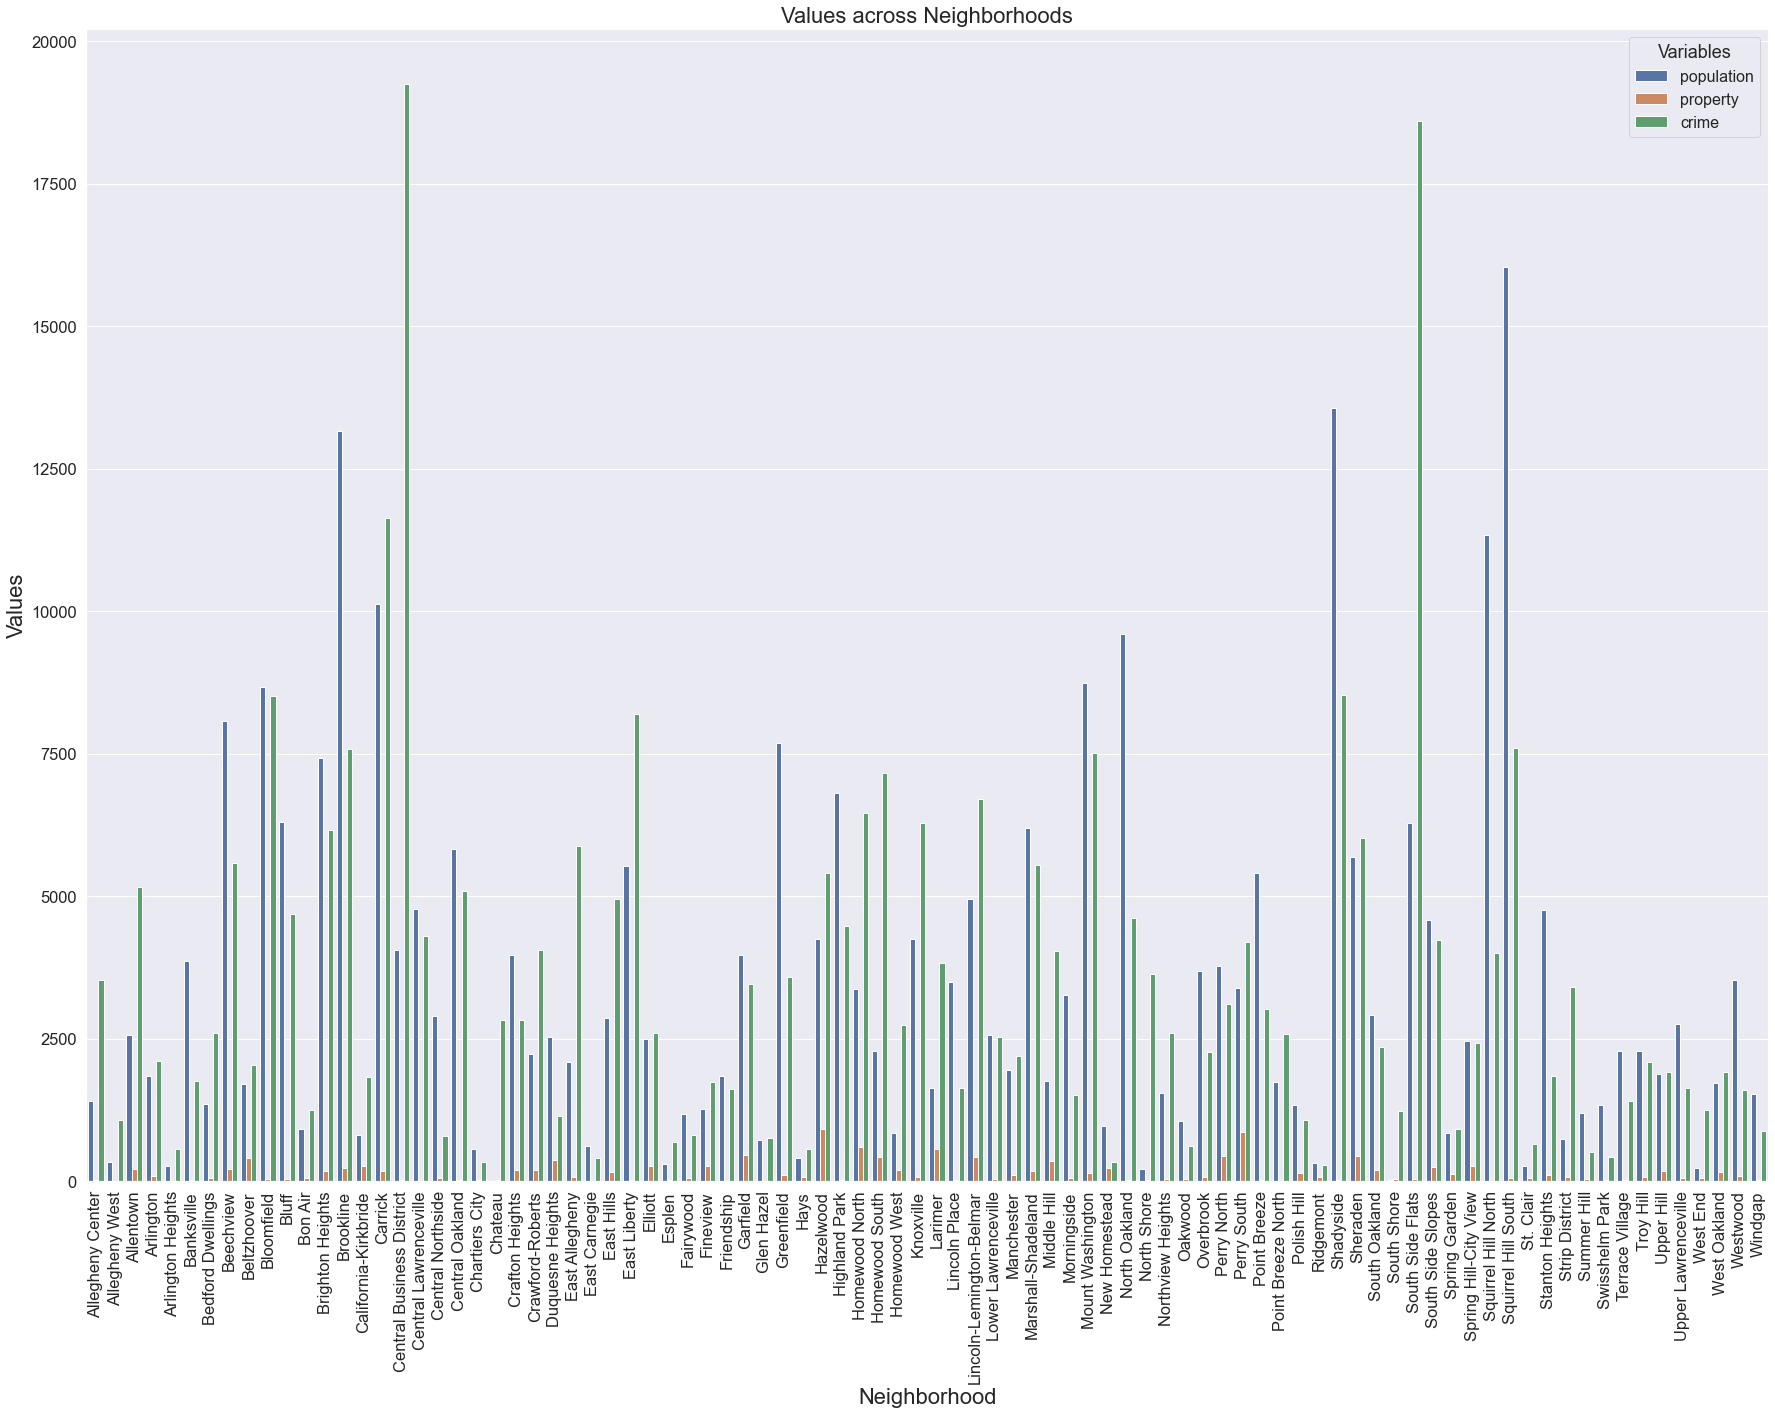

In [14]:
import seaborn as sns
df_melted = df.melt(id_vars='Neighborhood', var_name='Variables', value_name='Values')

# Create a bar plot using Seaborn
plt.figure(figsize=(25, 20))
sns.set(font_scale=1.5) 
ax = sns.barplot(x='Neighborhood', y='Values', hue='Variables', data=df_melted)
plt.xlabel('Neighborhood', fontsize=22) 
plt.ylabel('Values', fontsize=22) 
plt.title('Values across Neighborhoods', fontsize=22) 
plt.legend(title='Variables', fontsize=16)  

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout() 
plt.show()

### Selecting a neighborhood
After discussion we both believe that it's important to prioritize lower crime rates, fewer city-owned propertites, and higher population. So we assigned weigth to signify the importance of each column

- Crime has the highest relative importance (Weight = 3).
- City-owned property has moderate importance (Weight = 2).
- Population has the lowest relative importance (Weight = 1).

For our specific criteria:

A lower weighted average would be preferable.
A lower weighted average would suggest neighborhoods that align more closely with our preferences, meaning they have lower crime rates, fewer city-owned properties, and higher populations, considering their weighted contributions.
A lower weighted average in this context would indicate neighborhoods that better fit our criteria of low crime, fewer city-owned properties, and higher population, as these factors are weighted more heavily in our decision-making process.

In [18]:
dfw=df
#normalize the data so the outliers won't affect the data

from sklearn.preprocessing import MinMaxScaler

# Select the columns for normalization
selected_columns = ['crime', 'property', 'population']
# Create a MinMaxScaler 
scaler = MinMaxScaler()
#outliers won't affect the data
dfw[selected_columns] = scaler.fit_transform(dfw[selected_columns])

##########################################################################

# Assign weights
weights = {
    'crime': 3,  # Assign a weight for 'crime'
    'property': 2,  # Assign a weight for 'property'
    'population': 1 # Assign a weight for 'population'
}

# Calculate weighted average
dfw['weighted_average'] = (dfw['crime'] * weights['crime'] +
                    dfw['property'] * weights['property'] +
                    dfw['population'] * weights['population'])
dfw.head()

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Neighborhood,population,property,crime,weighted_average
0,Allegheny Center,0.087786,0.015436,0.170832,0.631153
1,Allegheny West,0.021198,0.003308,0.041390,0.151983
2,Allentown,0.159299,0.238148,0.256881,1.406237
3,Arlington,0.115282,0.090408,0.095803,0.583506
4,Arlington Heights,0.016772,0.000000,0.014183,0.059321


In [19]:
#sort the weighted average in ascending order
dfwasc = dfw.sort_values(by='weighted_average',ascending = True)
dfwasc.head()

,Neighborhood,population,property,crime,weighted_average
4,Arlington Heights,0.016772,0.000000,0.014183,0.059321
26,East Carnegie,0.037845,0.011025,0.005589,0.076663
20,Chartiers City,0.034728,0.023153,0.001898,0.086729
35,Glen Hazel,0.044454,0.003308,0.024887,0.125729
30,Esplen,0.019078,0.029768,0.021090,0.141887


## Conclusion


In this scenario, we prioritize lower crime rates, fewer city-owned properties, and higher population, the assigned weights imply that:

- Crime has the highest relative importance (Weight = 3).
- City-owned property has moderate importance (Weight = 2).
- Population has the lowest relative importance (Weight = 1).

For our specific criteria:

A lower weighted average would be preferable.
A lower weighted average would suggest neighborhoods that align more closely with our preferences, meaning they have lower crime rates, fewer city-owned properties, and higher populations, considering their weighted contributions.
A lower weighted average in this context would indicate neighborhoods that better fit our criteria of low crime, fewer city-owned properties, and higher population, as these factors are weighted more heavily in our decision-making process.

### THE IDEAL NEIGHBORHOOD TO INVEST IN REAL ESTATE WOULD BE: <span style="color:green"> Arlighton Height </span>
![house](home.jpg)